News_Mood
The observed trends are
1. tweets of CBS has high positive polarity
2.tweets of New York times has negative polarity
3.tweets of Fox and CNN are more of neutral

In [16]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from tweet_config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [30]:
### News outlets
target_group=['@CNN','@BBC','@CBS','@nytimes','@FoxNews']

# Variables for holding sentiments
sentiments = []
for target_term in target_group:
    oldest_tweet= None
    # Counter
    counter = 1
    for x in range(4):
        public_tweets = api.user_timeline(target_term, count=25, max_id=oldest_tweet,page=x)
        #looping over 100 tweets 25tweets in each pages(5)
        for tweet in public_tweets:
            polarity = analyzer.polarity_scores(tweet["text"])
            
            tweets_ago = counter
            #appending to sentiment list
            sentiments.append({"Date": tweet["created_at"], 
                           "NewsOrg":target_term,
                         "Text":tweet["text"],
                          "Compound":polarity["compound"],
                          "Positive":polarity["pos"],
                          "Neutral": polarity["neu"],
                          "Negative":polarity["neg"],
                          "Tweets Ago": counter})
            counter+=1
    oldest_tweet = tweet['id'] - 1

In [38]:
#changing the sentiment list into dataframe
sentiments_df = pd.DataFrame.from_dict(sentiments)

In [40]:
sentiments_df.head()

,Compound,Date,Negative,Neutral,NewsOrg,Positive,Text,Tweets Ago
0,0.4019,Tue Apr 10 18:46:07 +0000 2018,0.0,0.876,@CNN,0.124,RT @CNNPolitics: White House press secretary S...,1
1,0.0772,Tue Apr 10 18:40:58 +0000 2018,0.0,0.920,@CNN,0.080,Facebook CEO Mark Zuckerberg is testifying bef...,2
2,0.0000,Tue Apr 10 18:35:01 +0000 2018,0.0,1.000,@CNN,0.000,Facebook CEO Mark Zuckerberg has arrived to te...,3
3,0.6249,Tue Apr 10 18:31:02 +0000 2018,0.0,0.814,@CNN,0.186,Snowfall across the great white continent of A...,4
4,0.6204,Tue Apr 10 18:18:00 +0000 2018,0.0,0.612,@CNN,0.388,Apple is now completely powered by clean energ...,5


In [41]:
sentiments_df.to_csv("sentiment_output.csv")

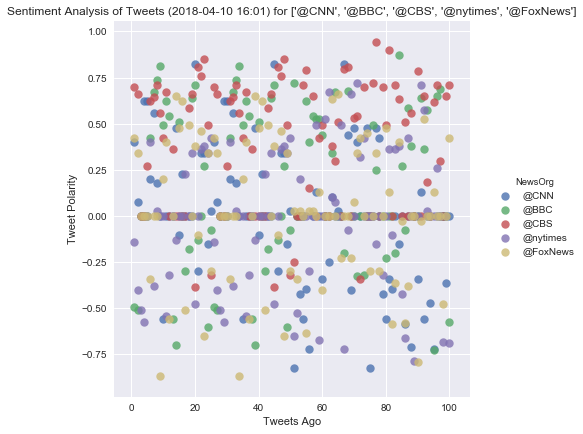

In [37]:
#ploting the sentiments of each news media
sns.set()
sns.lmplot(x='Tweets Ago', y='Compound', data=sentiments_pd, hue="NewsOrg", fit_reg=False , size=6,
           scatter_kws={"s":70}, scatter=True)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_group}")

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

### Overall Media Sentiment

In [53]:
#Grouping the sentiment dataframe by news meadia
overall_media_sentiment=sentiments_df.groupby("NewsOrg",as_index=False).agg({"Compound":"mean",
                                                              "Negative":"mean",
                                                              "Neutral":"mean",
                                                              "Positive":"mean"})


In [55]:
overall_media_sentiment.head()

,NewsOrg,Compound,Negative,Neutral,Positive
0,@BBC,0.143665,0.05129,0.83819,0.11051
1,@CBS,0.360828,0.01394,0.84551,0.14052
2,@CNN,0.011280,0.05544,0.88025,0.06431
3,@FoxNews,0.025233,0.08861,0.81522,0.09614
4,@nytimes,-0.009190,0.05907,0.87967,0.06125


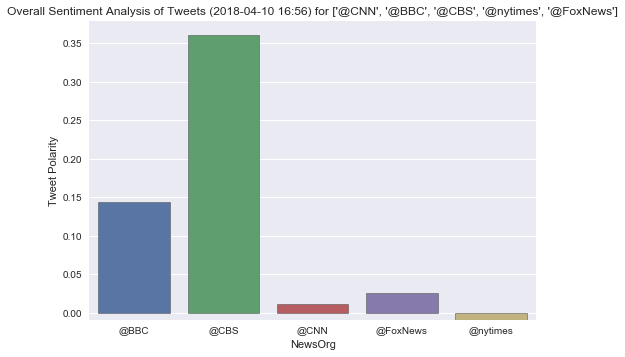

In [64]:
sns.barplot('NewsOrg', "Compound", data=overall_media_sentiment, linewidth=0.5, edgecolor=".3")
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Sentiment Analysis of Tweets ({now}) for {target_group}")

plt.ylabel("Tweet Polarity")
plt.show()